In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay, auc
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


In [2]:
df = pd.read_pickle("../data/reviews_vector_2grams.pkl")

In [3]:
X=df[df.columns[4:]]
y=df["binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# function which downsamples the majority class in a dataframe
def downsample_binary(y_train_in, X_train_in, min = 0, maj=1):
    # combine x and y
    data = pd.concat([y_train_in, X_train_in], axis=1)
    target_name = data.columns[0]
    
    # count the instances of the minority class
    minority_count = data[data[target_name] == min].shape[0]
    
    # random sample from the majority class
    majority_sample = data[data[target_name] == maj].sample(n=minority_count, random_state=42)
    
    # merge together
    balanced_df = pd.concat([data[data[target_name] == min], majority_sample])
    
    # Shuffle
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

balanced_set = downsample_binary(y_train, X_train)

In [5]:
# balanced data training split
X_train_bal = balanced_set.drop("binary", axis=1)
y_train_bal = balanced_set["binary"]


In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [7]:
scaler_bal = StandardScaler()
scaler_bal.fit(X_train_bal)
X_train_transformed_bal = scaler.transform(X_train_bal)
X_test_transformed_bal = scaler.transform(X_test)

In [8]:

random_forest_model = RandomForestClassifier(n_estimators=30, random_state=42) 
random_forest_model.fit(X_train_transformed, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

In [9]:
y_train_predicted = random_forest_model.predict(X_train_transformed)
y_test_predicted = random_forest_model.predict(X_test_transformed)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34     34325
           1       0.80      0.95      0.87    109233

    accuracy                           0.78    143558
   macro avg       0.71      0.59      0.61    143558
weighted avg       0.76      0.78      0.74    143558



In [10]:

random_forest_model_bal = RandomForestClassifier(n_estimators=30, random_state=42) 
random_forest_model_bal.fit(X_train_transformed_bal, y_train_bal)

RandomForestClassifier(n_estimators=30, random_state=42)

In [11]:
y_train_predicted_bal = random_forest_model_bal.predict(X_train_transformed_bal)
y_test_predicted_bal = random_forest_model_bal.predict(X_test_transformed_bal)
print(classification_report(y_test, y_test_predicted_bal))

              precision    recall  f1-score   support

           0       0.38      0.80      0.52     34325
           1       0.91      0.60      0.72    109233

    accuracy                           0.65    143558
   macro avg       0.64      0.70      0.62    143558
weighted avg       0.78      0.65      0.67    143558



In [12]:
y_train_predicted = random_forest_model.predict(X_train_transformed)
y_test_predicted = random_forest_model.predict(X_test_transformed)
train_acc_unbal = accuracy_score(y_train, y_train_predicted)
test_acc_unbal= accuracy_score(y_test, y_test_predicted)
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34     34325
           1       0.80      0.95      0.87    109233

    accuracy                           0.78    143558
   macro avg       0.71      0.59      0.61    143558
weighted avg       0.76      0.78      0.74    143558



In [13]:
# estimators = [('normalise', StandardScaler()),
#               ('model', RandomForestClassifier(n_estimators=30, random_state=12))]
# pipe = Pipeline(estimators)

# params = {'normalise': [StandardScaler()],
#     'model__criterion': ["entropy"],
#     'model__n_estimators': [30,60,100],
#     'model__random_state':[12]
#     # 'model__max_depth': [5,10,15],
#     # 'model__min_samples_leaf': [3,5]
#     # # 'model__min_samples_split':[5,10]  
# }

# grid_search = GridSearchCV(pipe, param_grid=params, verbose=3, n_jobs=2)
# fitted_forest = grid_search.fit(X_train, y_train)

In [14]:
y_test_pred = random_forest_model.predict(X_test_transformed) 

In [15]:
y_test_pred_bal = random_forest_model_bal.predict(X_test_transformed_bal) 

In [16]:
accuracy_score(y_test,y_test_pred_bal)

0.6461360565067777

In [17]:
y_pred_total_bal = random_forest_model_bal.predict(X_test_transformed_bal)

In [18]:
cm = confusion_matrix(y_test, y_test_pred)
cm_norm = confusion_matrix(y_test, y_test_pred, normalize="true")

In [19]:
cm_bal = confusion_matrix(y_test, y_test_pred_bal)
cm_norm_bal = confusion_matrix(y_test, y_test_pred_bal, normalize="true")

In [20]:
cm_full_bal = confusion_matrix(y, y_pred_total_bal)
cm_full_bal_norm = confusion_matrix(y, y_pred_total_bal, normalize="true")

ValueError: Found input variables with inconsistent numbers of samples: [717786, 143558]

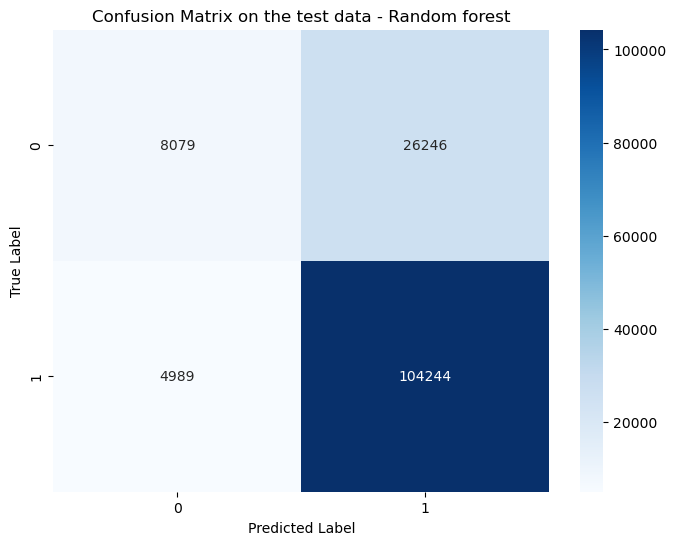

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

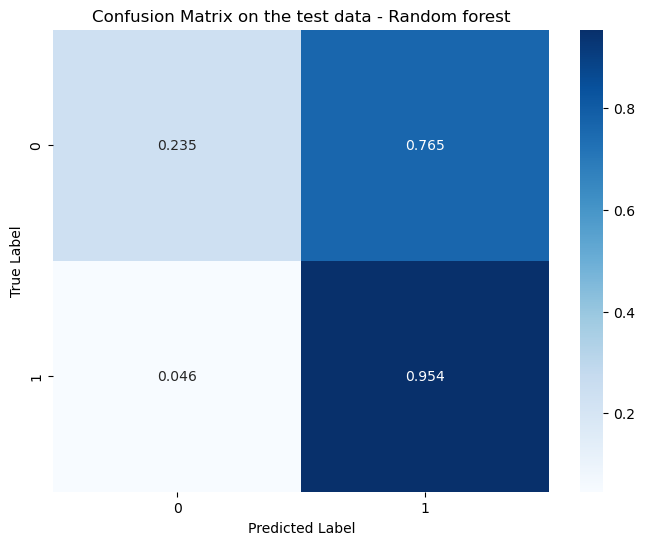

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest")
plt.show()

In [24]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.62      0.24      0.34     34325
           1       0.80      0.95      0.87    109233

    accuracy                           0.78    143558
   macro avg       0.71      0.59      0.61    143558
weighted avg       0.76      0.78      0.74    143558



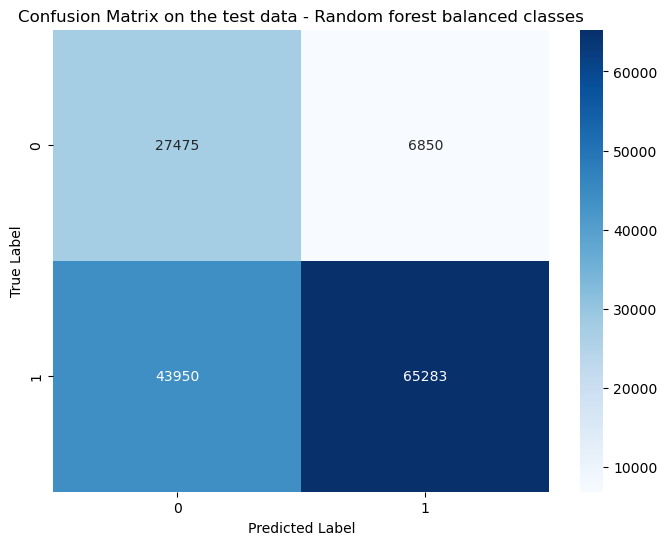

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

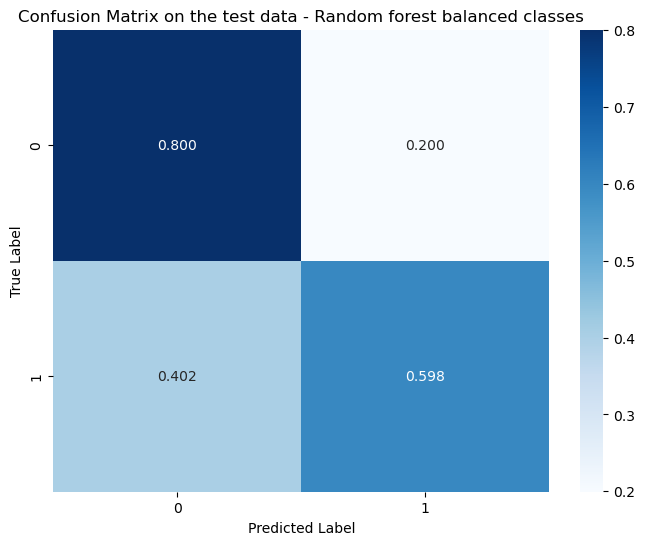

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_norm_bal, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on the test data - Random forest balanced classes")
plt.show()

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_full_bal, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on full dataset")
plt.show()

NameError: name 'cm_full_bal' is not defined

<Figure size 800x600 with 0 Axes>

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_full_bal_norm, annot=True, fmt=".3f", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix on full dataset")
plt.show()

NameError: name 'cm_full_bal_norm' is not defined

<Figure size 800x600 with 0 Axes>

In [29]:
# for ROC later
y_proba_test = random_forest_model.predict_proba(X_test_transformed)
y_proba_test_bal = random_forest_model_bal.predict_proba(X_test_transformed_bal)

In [30]:
fpr_unbal, tpr_unbal, thresholds_unbal = roc_curve(y_test.values,y_proba_test[:,1])
roc_auc1 = auc(fpr_unbal, tpr_unbal)
display1 = RocCurveDisplay(fpr=fpr_unbal, tpr=tpr_unbal, roc_auc=roc_auc1, estimator_name='Unbalanced RandomForest')

In [31]:
fpr_bal, tpr_bal, thresholds_bal = roc_curve(y_test.values,y_proba_test_bal[:,1])
roc_auc2 = auc(fpr_bal, tpr_bal)
display2 = RocCurveDisplay(fpr=fpr_bal, tpr=tpr_bal, roc_auc=roc_auc2, estimator_name='Balanced RandomForest')

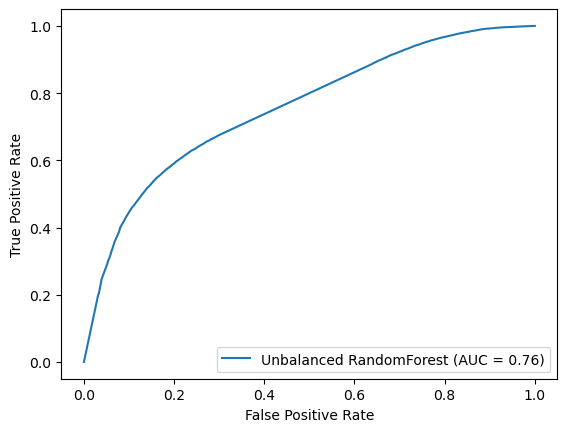

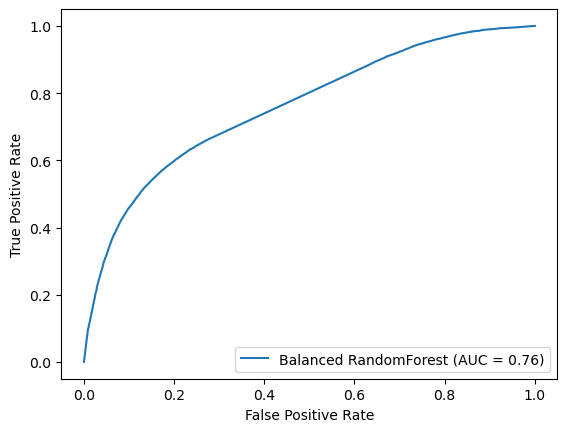

In [32]:
display1.plot()
display2.plot()
plt.show()

In [33]:


# # fitting AdaBoost model with 20 estimators
# abc_2 = AdaBoostClassifier(n_estimators=20)
# abc_2.fit(X_train_transformed_bal, y_train_bal)

# # evaluate
# y_pred_ada = abc_2.predict(X_test_transformed_bal)
# print(classification_report(y_test, y_pred_ada))

In [34]:
y_pred_baseline= random_forest_model.predict(scaler.transform(df[df.columns[4:]]))

incorrect_guesses = df["binary"] != y_pred_baseline
incorrect_v = pd.Series(y_pred_baseline)[incorrect_guesses]
ig = pd.concat([pd.Series(incorrect_v),df[incorrect_guesses]], axis=1)
ig

,0,overall,reviewText,length,binary,6s plu,absolut love,add bulk,add much,air bubbl,...,worth money,worth price,would buy,would definit,would highli,would like,would purchas,would recommend,would work,year old
3,1,2.0,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,92,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1,3.0,I FINALLY got my case today. It took forever t...,344,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,1.0,DO NOT BUY! this item is seriously cheap as he...,190,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,1,3.0,Can not argue with the price or appearance. Lo...,150,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,2.0,I used this case for not even a week and the b...,118,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717774,1,1.0,"I work outside a lot, and sunlight can render ...",397,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717775,1,3.0,I like the battery life the only two problems ...,186,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717779,1,1.0,The glass screen was smashed when it arrived.,45,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
717783,1,1.0,Mediocre case protection. Clip is junk. Broke/...,62,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
rev = ig.loc[98]
text = rev["reviewText"]
print(f"Actual: {rev['binary']}, Guess: {rev[0]}, Overall: {int(rev['overall'])}")
print(f"Review: {text[:47]} \n{text[47: ]}")

Actual: 0, Guess: 1, Overall: 3
Review: Great product, works very good with no issue 



In [36]:
feature_values = scaler.transform(ig.loc[2, df.columns[4:]].values.reshape(1, -1))
fi = random_forest_model.feature_importances_
fi.reshape(1,-1).shape

feature_contributions = pd.DataFrame(fi.reshape(1,-1), columns=X.columns, index=['Contribution']).T
sorted_contributions = feature_contributions.sort_values(by='Contribution', ascending=False)

print(sorted_contributions.head(10))

KeyError: 2